<a href="https://colab.research.google.com/github/DevVagabond/tensorflow-ml-templates/blob/main/Tensorflow_CNN_multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [2]:
#download the dataset

import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

--2025-03-23 15:30:15--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  81.5MB/s    in 5.9s    

2025-03-23 15:30:21 (83.8 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
#check data
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

# set the dynamic class names in an array
import pathlib

data_dir = pathlib.Path("10_food_classes_all_data/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)


There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.

In [4]:
#Fetch random images from directory
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image_path = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image_path[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img



Image shape: (384, 512, 3)


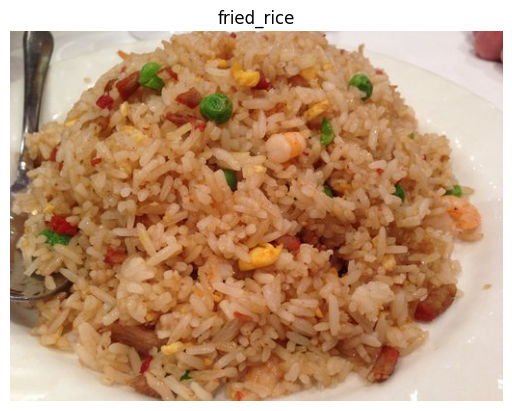

In [5]:
img = view_random_image(target_dir="10_food_classes_all_data/train/", target_class=random.choice(class_names))

In [6]:
#Image augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

image_gen_train = ImageDataGenerator(rescale=1/255.)
image_gen_test = ImageDataGenerator(rescale=1/255.)

train_path = "10_food_classes_all_data/train"
test_path = "10_food_classes_all_data/test"


In [7]:
image_train = image_gen_train.flow_from_directory(
    directory=train_path,
    batch_size=32,
    target_size=(224,224),
    seed=42,
    class_mode="categorical"
)

image_test = image_gen_test.flow_from_directory(
    directory=test_path,
    batch_size=32,
    target_size=(224,224),
    seed=42,
    class_mode="categorical"
)


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [12]:
#build the model

model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation="softmax")
])


model_cnn.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [13]:
model_cnn.fit(image_train,epochs=20,steps_per_epoch=len(image_train),validation_data=image_test,validation_steps=len(image_test))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 43s 155ms/step - accuracy: 0.1718 - loss: 2.2799 - val_accuracy: 0.2944 - val_loss: 2.0032
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 34s 143ms/step - accuracy: 0.3271 - loss: 1.9471 - val_accuracy: 0.3444 - val_loss: 1.9025
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 38s 133ms/step - accuracy: 0.4459 - loss: 1.6482 - val_accuracy: 0.3292 - val_loss: 1.9332
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 36s 151ms/step - accuracy: 0.6201 - loss: 1.1716 - val_accuracy: 0.3120 - val_loss: 2.0965
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 38s 138ms/step - accuracy: 0.8427 - loss: 0.5326 - val_accuracy: 0.2776 - val_loss: 3.0514
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 131ms/step - accuracy: 0.9602 - loss: 0.1611 - val_accuracy: 0.2712 - val_loss: 4.2916
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 134ms/step - accuracy: 0.9785 - loss: 0.0795 - val_accuracy: 0.2656 - val_loss: 5.3368
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 32s 137ms/step - accuracy: 0.9934 - loss: 0

In [15]:
model_cnn.evaluate(image_test)

79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - accuracy: 0.2683 - loss: 8.9920


[8.984917640686035, 0.2667999863624573]

In [37]:

#predict random image from  directory path
def predict_image(img_path):
  img = mpimg.imread(img_path)
  img = tf.constant(img)
  img = tf.image.resize(img,size=(224,224))
  img = img/255
  img = tf.expand_dims(img,axis=0)
  prediction = model_cnn.predict(img)
  pred_class = class_names[np.argmax(prediction)]
  return pred_class



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class: chicken_curry


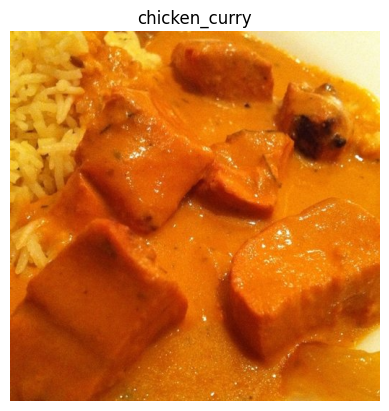

In [53]:
class_name = random.choice(class_names)
pred_path = "10_food_classes_all_data/train/"+class_name
pred = predict_image(pred_path+"/"+random.sample(os.listdir(pred_path),1)[0])
plt.imshow(mpimg.imread(pred_path+"/" + os.listdir(pred_path)[random_number]))
plt.title(class_name)
plt.axis("off")

print(f"Predicted class: {pred}")